<a href="https://colab.research.google.com/github/CHENNURUHARISH/23024881-CLUSTERING-FITTING/blob/main/FINAL_DRAFT_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

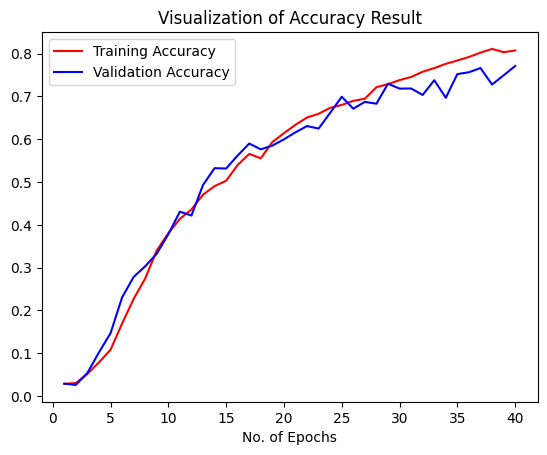

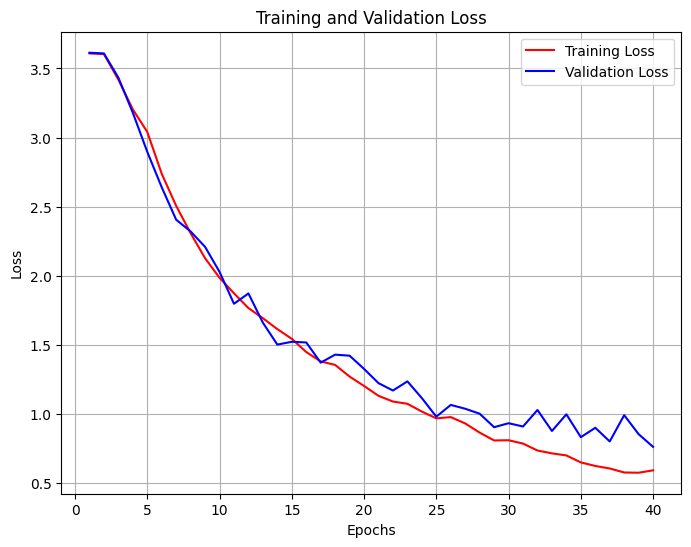

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

import os

# Data Augmentation & Normalization

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)
print('Training Loss:', train_loss)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)
print('Validation Loss:', val_loss)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)



In [ ]:
cnn.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1020)           │     2,089,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1020)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 37)             │        37,777 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,519,945 (78.28 MB)

 Trainable params: 6,839,981 (26.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,679,964 (52.18 MB)

Healthy vs Unhealthy Classification Report:

              precision    recall  f1-score   support

   Unhealthy       0.87      0.73      0.79      2800
     Healthy       0.47      0.70      0.56       970

    accuracy                           0.72      3770
   macro avg       0.67      0.71      0.68      3770
weighted avg       0.77      0.72      0.73      3770



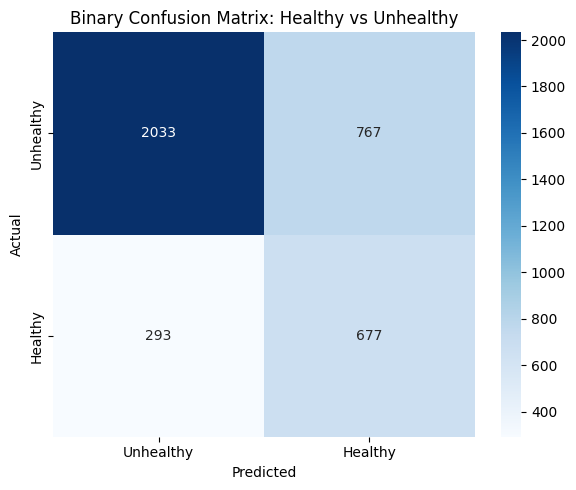

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# --- Define Healthy Classes (based on name) ---
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# --- Convert to Binary Labels ---
y_true_binary = [1 if label in healthy_class_indices else 0 for label in Y_true.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in predicted_categories.numpy()]

# --- Classification Report ---
print("Healthy vs Unhealthy Classification Report:\n")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unhealthy", "Healthy"],
            yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Confusion Matrix: Healthy vs Unhealthy")
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

import os

# Data Augmentation & Normalization

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))


# Now you can print the class names
print("Training Set Classes:", class_names)

# train_dataset
# for x,y in train_dataset:
#   print(x, x.shape)
#   print(y, y.shape)
#   break

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=38)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)
# print('Training Loss:', train_loss)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)
# print('Validation Loss:', val_loss)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

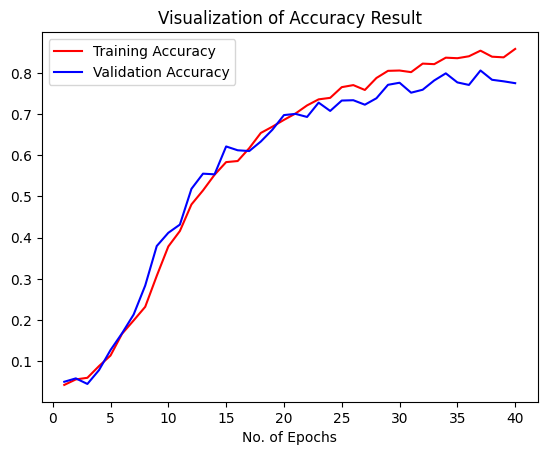

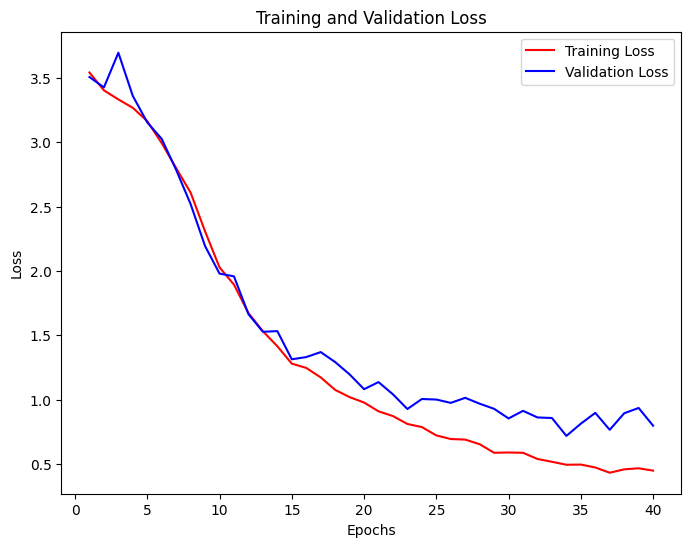

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

import os

# Data Augmentation & Normalization

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)
# print('Training Loss:', train_loss)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)
# print('Validation Loss:', val_loss)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

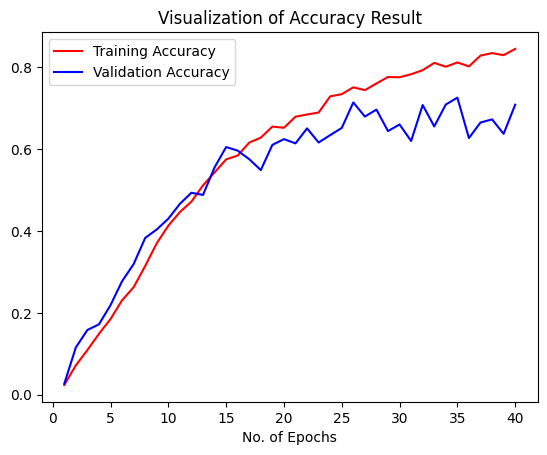

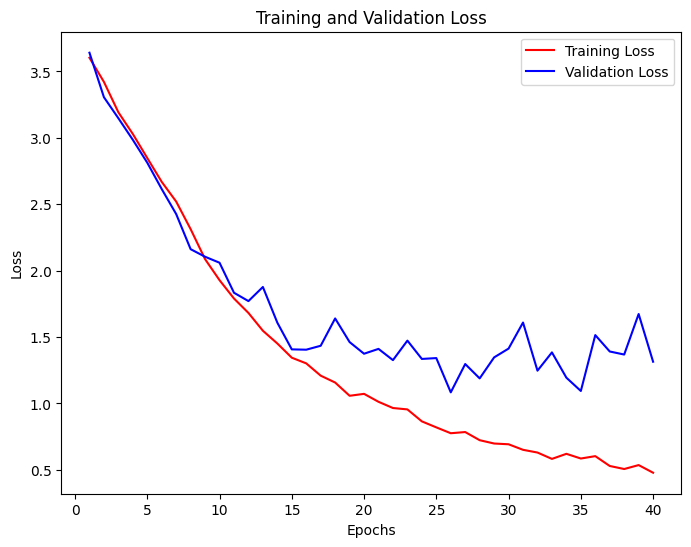

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

import os

# Data Augmentation & Normalization

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)
# print('Training Loss:', train_loss)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)
# print('Validation Loss:', val_loss)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)



In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

import os

# Data Augmentation & Normalization

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)
# print('Training Loss:', train_loss)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)
# print('Validation Loss:', val_loss)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

KeyboardInterrupt: 

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

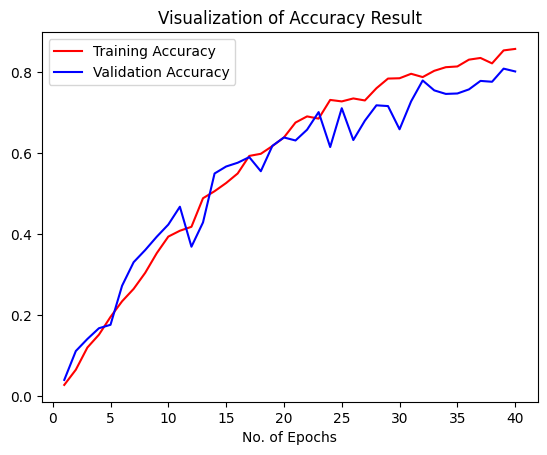

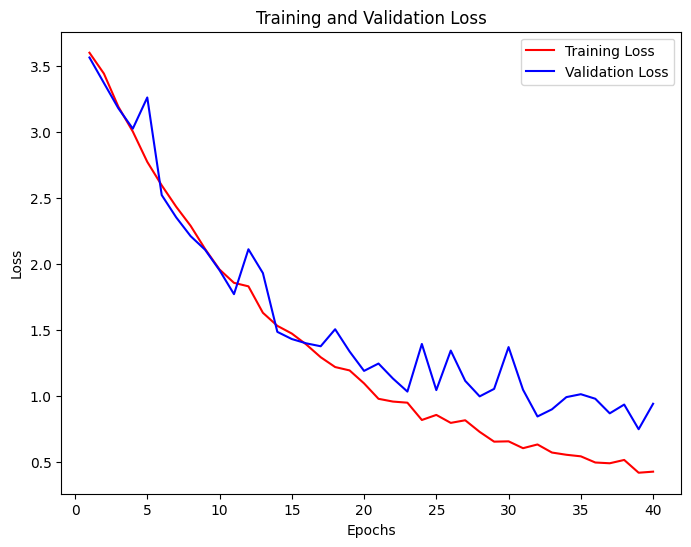

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

import os

# Data Augmentation & Normalization

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)
# print('Training Loss:', train_loss)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)
# print('Validation Loss:', val_loss)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

import os

# Data Augmentation & Normalization

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)
# print('Training Loss:', train_loss)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)
# print('Validation Loss:', val_loss)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

Healthy vs Unhealthy Classification Report:

              precision    recall  f1-score   support

   Unhealthy       0.75      0.99      0.85      2800
     Healthy       0.60      0.03      0.06       970

    accuracy                           0.75      3770
   macro avg       0.67      0.51      0.45      3770
weighted avg       0.71      0.75      0.65      3770



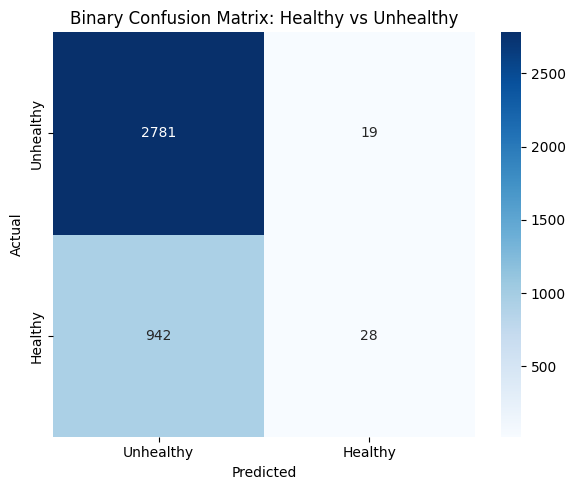

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
# --- Define Healthy Classes (based on name) ---
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# --- Convert to Binary Labels ---
y_true_binary = [1 if label in healthy_class_indices else 0 for label in Y_true.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in predicted_categories.numpy()]

# --- Classification Report ---
print("Healthy vs Unhealthy Classification Report:\n")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unhealthy", "Healthy"],
            yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Confusion Matrix: Healthy vs Unhealthy")
plt.tight_layout()
plt.show()

# **VGG16 MODEL**

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 67s 541ms/step - accuracy: 0.0604 - loss: 3.5687 - val_accuracy: 0.2501 - val_loss: 3.2915 - learning_rate: 1.0000e-04
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 523ms/step - accuracy: 0.2566 - loss: 3.1589 - val_accuracy: 0.3573 - val_loss: 2.7878 - learning_rate: 1.0000e-04
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 67s 556ms/step - accuracy: 0.3823 - loss: 2.6270 - val_accuracy: 0.4721 - val_loss: 2.3011 - learning_rate: 1.0000e-04
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 65s 542ms/step - accuracy: 0.5145 - loss: 2.1644 - val_accuracy: 0.5050 - val_loss: 1.9729 - learning_rate: 1.0000e-04
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 522ms/step - accuracy: 0.5559 - loss: 1.8513 - val_accuracy: 0.5406 - val_loss: 1.7498 - learning_rate: 1.0000e-04
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 62s 517ms/step - accuracy: 0.6065 - loss: 1.6020 - val_accuracy: 0.5849 - val_los

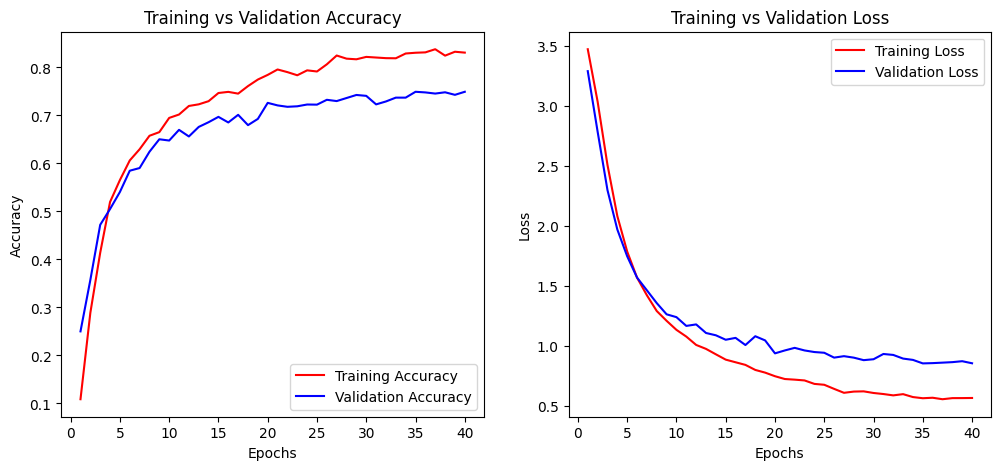

118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step

Healthy vs Unhealthy Classification Report:
              precision    recall  f1-score   support

   Unhealthy       0.99      0.87      0.93      2800
     Healthy       0.72      0.97      0.83       970

    accuracy                           0.90      3770
   macro avg       0.86      0.92      0.88      3770
weighted avg       0.92      0.90      0.90      3770



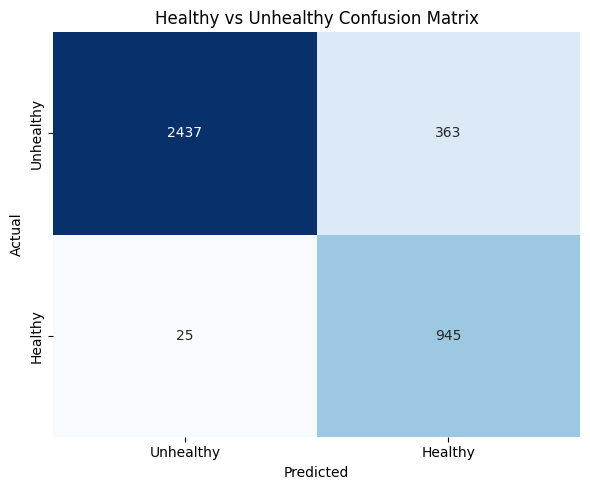

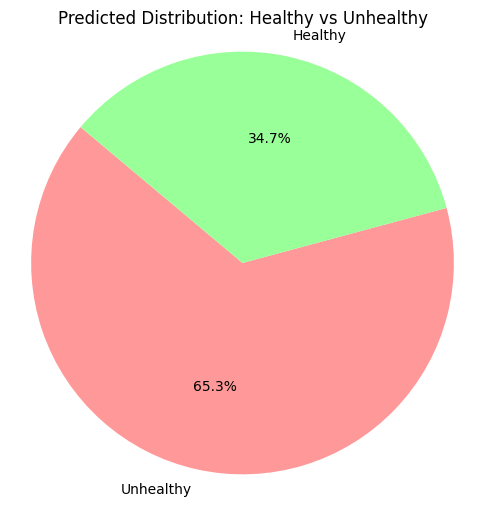

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

#  Load Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),  # VGG16 requires 224x224 input
    shuffle=True
)

#  Load Validation Dataset
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

#  Get Class Names
class_names = train_dataset.class_names
num_classes = len(class_names)

#  Data Augmentation & Normalization
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])
normalization_layer = Rescaling(1.0 / 255)

#  Apply Augmentation & Normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

#  VGG16 Model
def build_vgg16_model(num_classes, input_shape=(224, 224, 3)):  #  Fixed input shape
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model initially

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

#  Compile Model
vgg16_model = build_vgg16_model(num_classes)
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

#  Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

#  Train Model
vgg16_history = vgg16_model.fit(train_dataset, validation_data=valid_dataset, epochs=40, callbacks=[lr_scheduler, early_stopping])

#  Evaluate Model on Validation Set
val_loss, val_acc = vgg16_model.evaluate(valid_dataset)
print(f'VGG16 - Validation Accuracy: {val_acc:.4f}')
# print(f'VGG16 - Validation Loss: {val_loss:.4f}')

#  Evaluate Model on Training Set
train_loss, train_acc = vgg16_model.evaluate(train_dataset)
print(f'VGG16 - Training Accuracy: {train_acc:.4f}')
# print(f'VGG16 - Training Loss: {train_loss:.4f}')

# Save the trained model
vgg16_model.save('trained_plant_disease_VGG16_model.keras')

# #  Confusion Matrix
# y_pred = vgg16_model.predict(valid_dataset)
# predicted_categories = tf.argmax(y_pred, axis=1)
# true_categories = tf.concat([y for x, y in valid_dataset], axis=0)
# Y_true = tf.argmax(true_categories, axis=1)

# cm_vgg16 = confusion_matrix(Y_true, predicted_categories)

# #  Plot Confusion Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('VGG16 Confusion Matrix')
# plt.show()

#  Plot Accuracy & Loss Graphs
epochs = range(1, len(vgg16_history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

#  Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, vgg16_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, vgg16_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

#  Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, vgg16_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, vgg16_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


#  Healthy vs Unhealthy Confusion Matrix for VGG16
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# Predict with VGG16 Model (on the validation dataset)
y_pred_probs = vgg16_model.predict(valid_dataset)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Convert true labels to indices
true_categories = tf.concat([y for x, y in valid_dataset], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Convert to binary classification (healthy=1, unhealthy=0)
y_true_binary = [1 if label in healthy_class_indices else 0 for label in true_categories.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in y_pred.numpy()]

# Classification report and confusion matrix for healthy vs unhealthy
print("\nHealthy vs Unhealthy Classification Report:")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# Compute confusion matrix for healthy vs unhealthy
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Plot healthy/unhealthy confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Healthy vs Unhealthy Confusion Matrix")
plt.tight_layout()
plt.show()

# Count predictions
import numpy as np

labels = ["Unhealthy", "Healthy"]
counts = np.bincount(y_pred_binary)  # [count_unhealthy, count_healthy]

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#99FF99'])
plt.title("Predicted Distribution: Healthy vs Unhealthy")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 555ms/step - accuracy: 0.0665 - loss: 3.5631 - val_accuracy: 0.2663 - val_loss: 3.2691 - learning_rate: 1.0000e-04
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 64s 528ms/step - accuracy: 0.2645 - loss: 3.1371 - val_accuracy: 0.3602 - val_loss: 2.7705 - learning_rate: 1.0000e-04
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 64s 533ms/step - accuracy: 0.3821 - loss: 2.6175 - val_accuracy: 0.4265 - val_loss: 2.3443 - learning_rate: 1.0000e-04
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 64s 534ms/step - accuracy: 0.5000 - loss: 2.1824 - val_accuracy: 0.4934 - val_loss: 2.0111 - learning_rate: 1.0000e-04
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 65s 539ms/step - accuracy: 0.5535 - loss: 1.8644 - val_accuracy: 0.5080 - val_loss: 1.7966 - learning_rate: 1.0000e-04
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 527ms/step - accuracy: 0.5698 - loss: 1.6370 - val_accuracy: 0.5515 - val_los

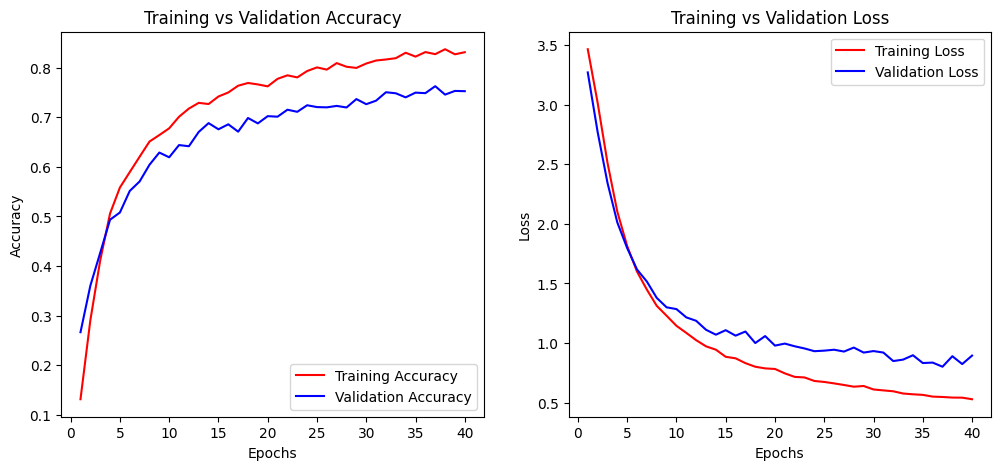

118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step

Healthy vs Unhealthy Classification Report:
              precision    recall  f1-score   support

   Unhealthy       0.99      0.89      0.94      2800
     Healthy       0.76      0.97      0.85       970

    accuracy                           0.91      3770
   macro avg       0.87      0.93      0.90      3770
weighted avg       0.93      0.91      0.92      3770



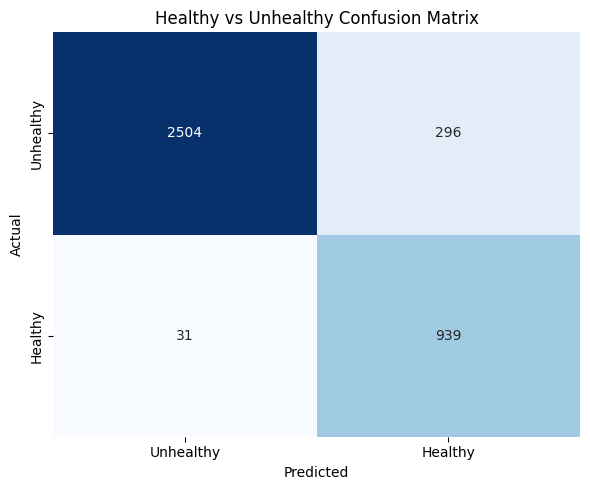

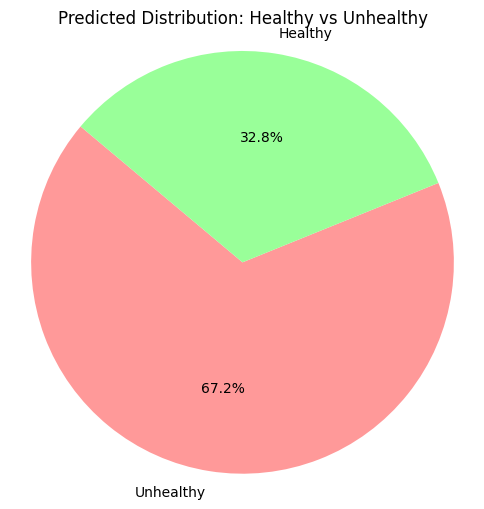

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

#  Load Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),  # VGG16 requires 224x224 input
    shuffle=True
)

#  Load Validation Dataset
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

#  Get Class Names
class_names = train_dataset.class_names
num_classes = len(class_names)

#  Data Augmentation & Normalization
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])
normalization_layer = Rescaling(1.0 / 255)

#  Apply Augmentation & Normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

#  VGG16 Model
def build_vgg16_model(num_classes, input_shape=(224, 224, 3)):  #  Fixed input shape
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model initially

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

#  Compile Model
vgg16_model = build_vgg16_model(num_classes)
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

#  Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

#  Train Model
vgg16_history = vgg16_model.fit(train_dataset, validation_data=valid_dataset, epochs=40, callbacks=[lr_scheduler, early_stopping])

#  Evaluate Model on Validation Set
val_loss, val_acc = vgg16_model.evaluate(valid_dataset)
print(f'VGG16 - Validation Accuracy: {val_acc:.4f}')
# print(f'VGG16 - Validation Loss: {val_loss:.4f}')

#  Evaluate Model on Training Set
train_loss, train_acc = vgg16_model.evaluate(train_dataset)
print(f'VGG16 - Training Accuracy: {train_acc:.4f}')
# print(f'VGG16 - Training Loss: {train_loss:.4f}')

# Save the trained model
vgg16_model.save('trained_plant1_disease_VGG16_model.keras')

# #  Confusion Matrix
# y_pred = vgg16_model.predict(valid_dataset)
# predicted_categories = tf.argmax(y_pred, axis=1)
# true_categories = tf.concat([y for x, y in valid_dataset], axis=0)
# Y_true = tf.argmax(true_categories, axis=1)

# cm_vgg16 = confusion_matrix(Y_true, predicted_categories)

# #  Plot Confusion Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('VGG16 Confusion Matrix')
# plt.show()

#  Plot Accuracy & Loss Graphs
epochs = range(1, len(vgg16_history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

#  Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, vgg16_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, vgg16_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

#  Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, vgg16_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, vgg16_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


#  Healthy vs Unhealthy Confusion Matrix for VGG16
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# Predict with VGG16 Model (on the validation dataset)
y_pred_probs = vgg16_model.predict(valid_dataset)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Convert true labels to indices
true_categories = tf.concat([y for x, y in valid_dataset], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Convert to binary classification (healthy=1, unhealthy=0)
y_true_binary = [1 if label in healthy_class_indices else 0 for label in true_categories.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in y_pred.numpy()]

# Classification report and confusion matrix for healthy vs unhealthy
print("\nHealthy vs Unhealthy Classification Report:")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# Compute confusion matrix for healthy vs unhealthy
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Plot healthy/unhealthy confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Healthy vs Unhealthy Confusion Matrix")
plt.tight_layout()
plt.show()

# Count predictions
import numpy as np

labels = ["Unhealthy", "Healthy"]
counts = np.bincount(y_pred_binary)  # [count_unhealthy, count_healthy]

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#99FF99'])
plt.title("Predicted Distribution: Healthy vs Unhealthy")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()


## **MOBILENET**

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 450ms/step - accuracy: 0.1286 - loss: 3.4104 - val_accuracy: 0.5408 - val_loss: 2.1527 - learning_rate: 1.0000e-04
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 376ms/step - accuracy: 0.5300 - loss: 1.9154 - val_accuracy: 0.6987 - val_loss: 1.3696 - learning_rate: 1.0000e-04
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 375ms/step - accuracy: 0.6726 - loss: 1.2910 - val_accuracy: 0.7512 - val_loss: 1.0562 - learning_rate: 1.0000e-04
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 370ms/step - accuracy: 0.7376 - loss: 1.0043 - val_accuracy: 0.7828 - val_loss: 0.8892 - learning_rate: 1.0000e-04
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 372ms/step - accuracy: 0.7791 - loss: 0.8437 - val_accuracy: 0.8027 - val_loss: 0.7982 - learning_rate: 1.0000e-04
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 375ms/step - accuracy: 0.798

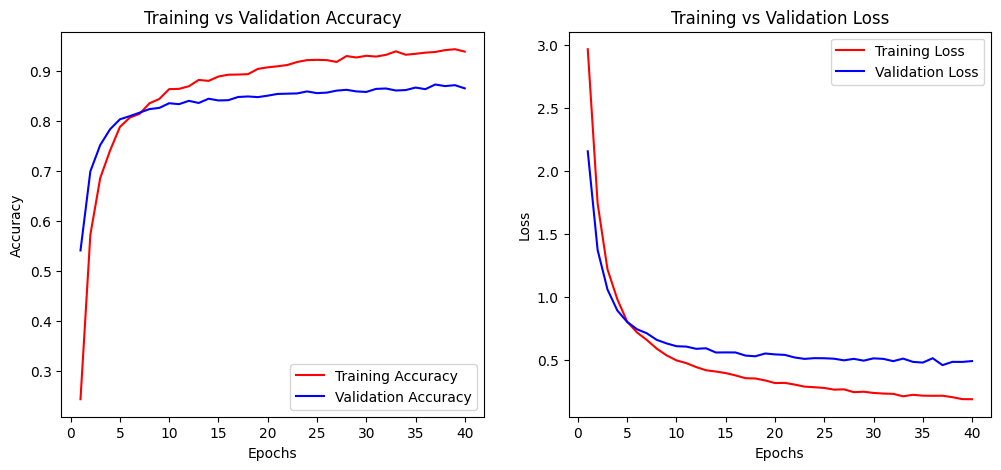


=== Full Class List ===
 0: Apple___Apple_scab             → Unhealthy
 1: Apple___Black_rot              → Unhealthy
 2: Apple___Cedar_apple_rust       → Unhealthy
 3: Apple___healthy                → Healthy
 4: Blueberry___healthy            → Healthy
 5: Cherry_(including_sour)___Powdery_mildew → Unhealthy
 6: Cherry_(including_sour)___healthy → Healthy
 7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot → Unhealthy
 8: Corn_(maize)___Common_rust_    → Unhealthy
 9: Corn_(maize)___Northern_Leaf_Blight → Unhealthy
10: Corn_(maize)___healthy         → Healthy
11: Grape___Black_rot              → Unhealthy
12: Grape___Esca_(Black_Measles)   → Unhealthy
13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) → Unhealthy
14: Grape___healthy                → Healthy
15: Orange___Haunglongbing_(Citrus_greening) → Unhealthy
16: Peach___Bacterial_spot         → Unhealthy
17: Peach___healthy                → Healthy
18: Pepper,_bell___Bacterial_spot  → Unhealthy
19: Pepper,_bell___healthy        

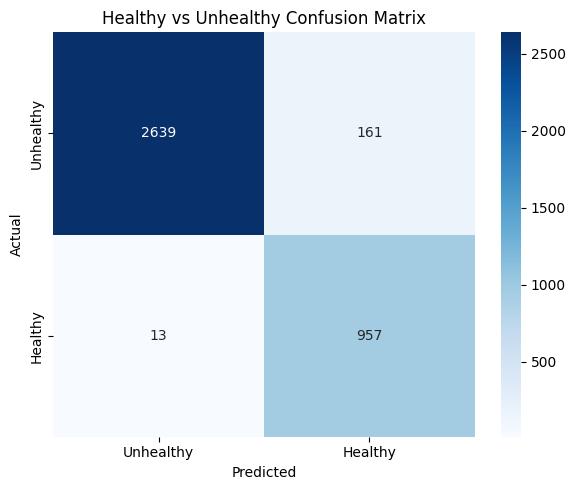

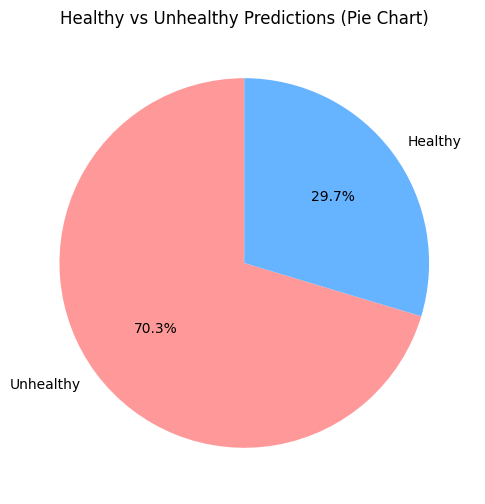

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

# Load Validation Dataset
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

# Get Class Names
class_names = train_dataset.class_names
num_classes = len(class_names)

# Data Augmentation & Normalization
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

# Apply Augmentation & Normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

#  Define MobileNet Model
def build_mobilenet_model(num_classes):
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base model initially

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Build & Compile MobileNet Model
mobilenet_model = build_mobilenet_model(num_classes)
mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the MobileNet Model
mobilenet_history = mobilenet_model.fit(train_dataset, validation_data=valid_dataset, epochs=40, callbacks=[lr_scheduler, early_stopping])

# Evaluate the Model on Validation Set
val_loss, val_acc = mobilenet_model.evaluate(valid_dataset)
print(f'\n MobileNet - Validation Accuracy: {val_acc:.4f}')
# print(f' MobileNet - Validation Loss: {val_loss:.4f}')

# Evaluate the Model on Training Set
train_loss, train_acc = mobilenet_model.evaluate(train_dataset)
print(f'\n MobileNet - Training Accuracy: {train_acc:.4f}')  # Fixed label
# print(f' MobileNet - Training Loss: {train_loss:.4f}')  # Fixed label

# Save the Model
mobilenet_model.save('mobilenet_plant_disease_model.keras')

#  Plot Accuracy & Loss Graphs
epochs = range(1, len(mobilenet_history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

#  Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, mobilenet_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, mobilenet_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

#  Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, mobilenet_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, mobilenet_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

#  Evaluate with Confusion Matrix for Healthy vs Unhealthy

# Identify healthy and unhealthy classes
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# Print all class names with index and label (Healthy / Unhealthy)
print("\n=== Full Class List ===")
for idx, cls in enumerate(class_names):
    label = "Healthy" if idx in healthy_class_indices else "Unhealthy"
    print(f"{idx:>2}: {cls:<30} → {label}")

# Predict with MobileNet Model (on the validation dataset)
y_pred_probs = mobilenet_model.predict(valid_dataset)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Convert true labels to indices
true_categories = tf.concat([y for x, y in valid_dataset], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Convert to binary classification (healthy=1, unhealthy=0)
y_true_binary = [1 if label in healthy_class_indices else 0 for label in true_categories.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in y_pred.numpy()]

# Classification report and confusion matrix
print("\nHealthy vs Unhealthy Classification Report:")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# Compute confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Plot healthy/unhealthy confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Healthy vs Unhealthy Confusion Matrix")
plt.tight_layout()
plt.show()
# Save the Model
mobilenet_model.save('mobilenet_plant_disease_model.keras')

# Assuming you have predictions in y_pred_binary
labels = ['Unhealthy', 'Healthy']
sizes = [sum([1 for x in y_pred_binary if x == 0]), sum([1 for x in y_pred_binary if x == 1])]

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Healthy vs Unhealthy Predictions (Pie Chart)")
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 448ms/step - accuracy: 0.1270 - loss: 3.3867 - val_accuracy: 0.5568 - val_loss: 2.0715 - learning_rate: 1.0000e-04
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 369ms/step - accuracy: 0.5420 - loss: 1.8565 - val_accuracy: 0.6830 - val_loss: 1.3154 - learning_rate: 1.0000e-04
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 371ms/step - accuracy: 0.6714 - loss: 1.2476 - val_accuracy: 0.7592 - val_loss: 1.0024 - learning_rate: 1.0000e-04
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 374ms/step - accuracy: 0.7348 - loss: 0.9888 - val_accuracy: 0.7687 - val_loss: 0.8801 - learning_rate: 1.0000e-04
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - accuracy: 0.7652 - loss: 0.8415 - val_accuracy: 0.7989 - val_loss: 0.7684 - learning_rate: 1.0000e-04
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 375ms/step - accuracy: 0.795

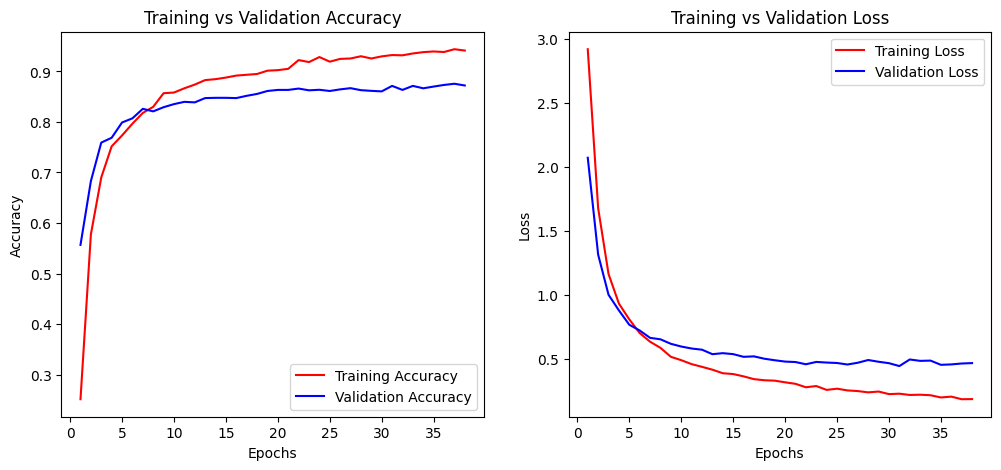


=== Full Class List ===
 0: Apple___Apple_scab             → Unhealthy
 1: Apple___Black_rot              → Unhealthy
 2: Apple___Cedar_apple_rust       → Unhealthy
 3: Apple___healthy                → Healthy
 4: Blueberry___healthy            → Healthy
 5: Cherry_(including_sour)___Powdery_mildew → Unhealthy
 6: Cherry_(including_sour)___healthy → Healthy
 7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot → Unhealthy
 8: Corn_(maize)___Common_rust_    → Unhealthy
 9: Corn_(maize)___Northern_Leaf_Blight → Unhealthy
10: Corn_(maize)___healthy         → Healthy
11: Grape___Black_rot              → Unhealthy
12: Grape___Esca_(Black_Measles)   → Unhealthy
13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) → Unhealthy
14: Grape___healthy                → Healthy
15: Orange___Haunglongbing_(Citrus_greening) → Unhealthy
16: Peach___Bacterial_spot         → Unhealthy
17: Peach___healthy                → Healthy
18: Pepper,_bell___Bacterial_spot  → Unhealthy
19: Pepper,_bell___healthy        

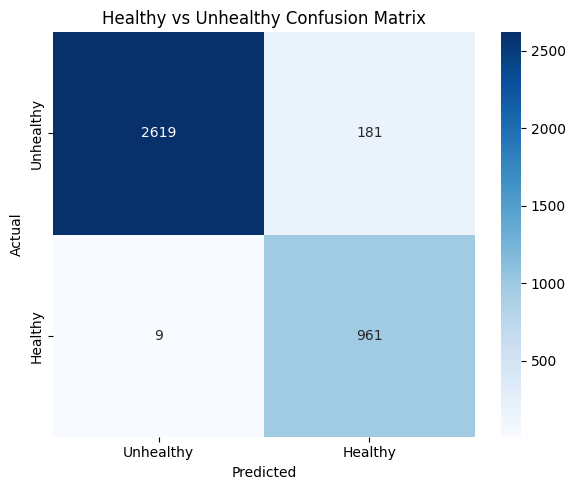

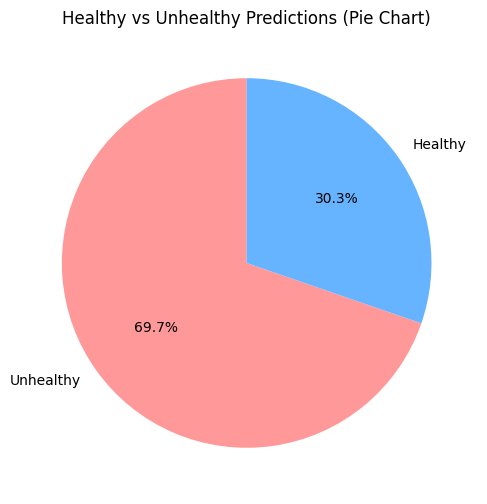

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

# Load Validation Dataset
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

# Get Class Names
class_names = train_dataset.class_names
num_classes = len(class_names)

# Data Augmentation & Normalization
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

# Apply Augmentation & Normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

#  Define MobileNet Model
def build_mobilenet_model(num_classes):
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base model initially

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Build & Compile MobileNet Model
mobilenet_model = build_mobilenet_model(num_classes)
mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the MobileNet Model
mobilenet_history = mobilenet_model.fit(train_dataset, validation_data=valid_dataset, epochs=40, callbacks=[lr_scheduler, early_stopping])

# Evaluate the Model on Validation Set
val_loss, val_acc = mobilenet_model.evaluate(valid_dataset)
print(f'\n MobileNet - Validation Accuracy: {val_acc:.4f}')
# print(f' MobileNet - Validation Loss: {val_loss:.4f}')

# Evaluate the Model on Training Set
train_loss, train_acc = mobilenet_model.evaluate(train_dataset)
print(f'\n MobileNet - Training Accuracy: {train_acc:.4f}')  # Fixed label
# print(f' MobileNet - Training Loss: {train_loss:.4f}')  # Fixed label

# Save the Model
mobilenet_model.save('mobilenet_plant_disease_model.keras')

#  Plot Accuracy & Loss Graphs
epochs = range(1, len(mobilenet_history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

#  Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, mobilenet_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, mobilenet_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

#  Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, mobilenet_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, mobilenet_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

#  Evaluate with Confusion Matrix for Healthy vs Unhealthy

# Identify healthy and unhealthy classes
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# Print all class names with index and label (Healthy / Unhealthy)
print("\n=== Full Class List ===")
for idx, cls in enumerate(class_names):
    label = "Healthy" if idx in healthy_class_indices else "Unhealthy"
    print(f"{idx:>2}: {cls:<30} → {label}")

# Predict with MobileNet Model (on the validation dataset)
y_pred_probs = mobilenet_model.predict(valid_dataset)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Convert true labels to indices
true_categories = tf.concat([y for x, y in valid_dataset], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Convert to binary classification (healthy=1, unhealthy=0)
y_true_binary = [1 if label in healthy_class_indices else 0 for label in true_categories.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in y_pred.numpy()]

# Classification report and confusion matrix
print("\nHealthy vs Unhealthy Classification Report:")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# Compute confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Plot healthy/unhealthy confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Healthy vs Unhealthy Confusion Matrix")
plt.tight_layout()
plt.show()
# Save the Model
mobilenet_model.save('mobilenet_plant_disease_model.keras')

# Assuming you have predictions in y_pred_binary
labels = ['Unhealthy', 'Healthy']
sizes = [sum([1 for x in y_pred_binary if x == 0]), sum([1 for x in y_pred_binary if x == 1])]

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Healthy vs Unhealthy Predictions (Pie Chart)")
plt.show()


# **MODEL COMPARISIONS**

Found 3770 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
CNN Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_

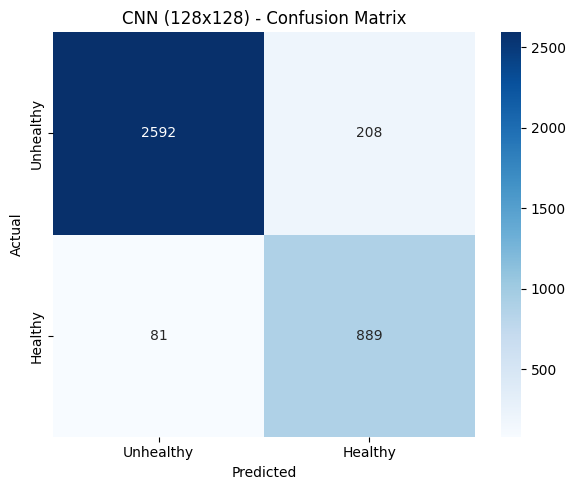

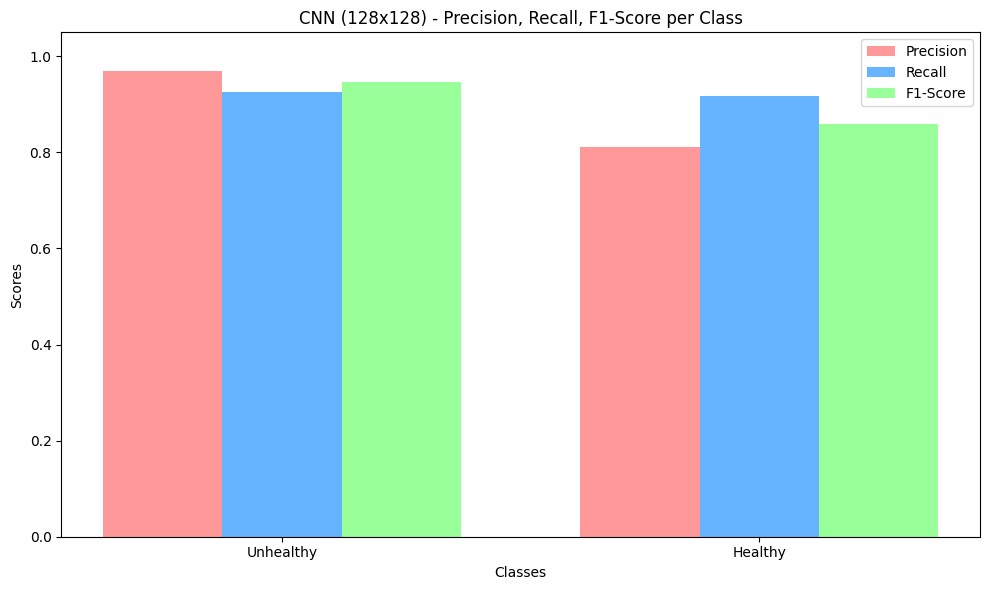

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

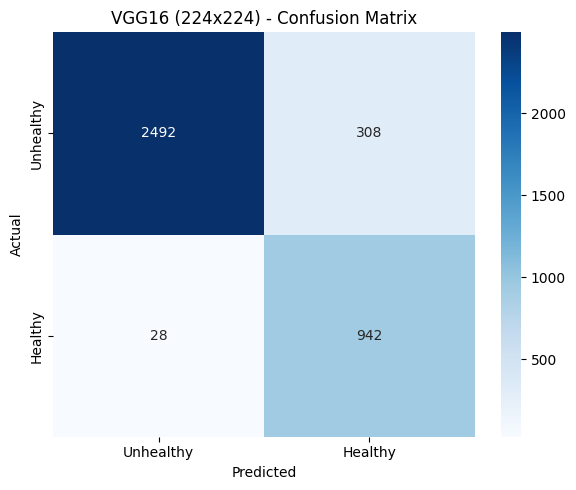

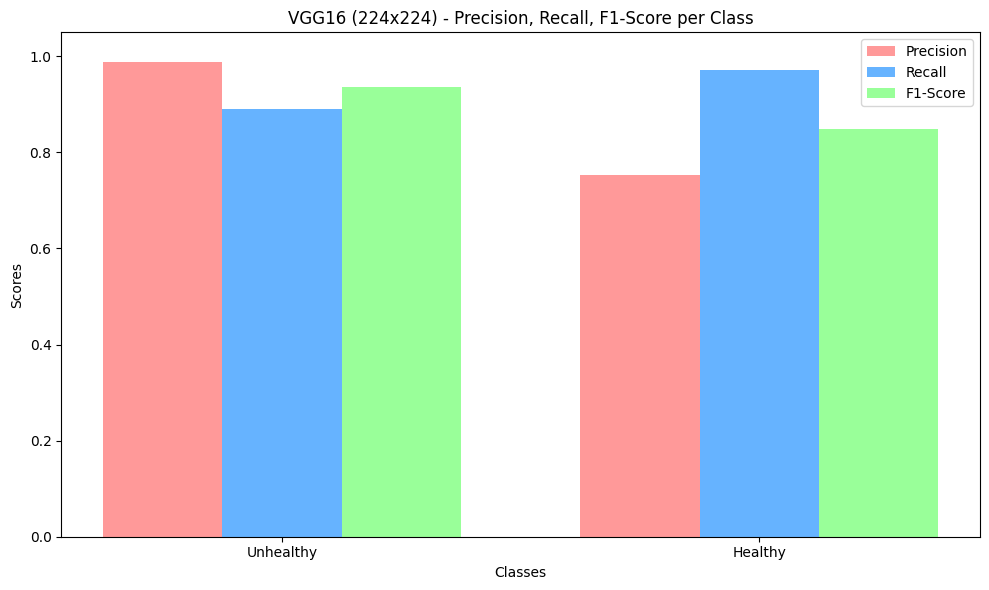

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━

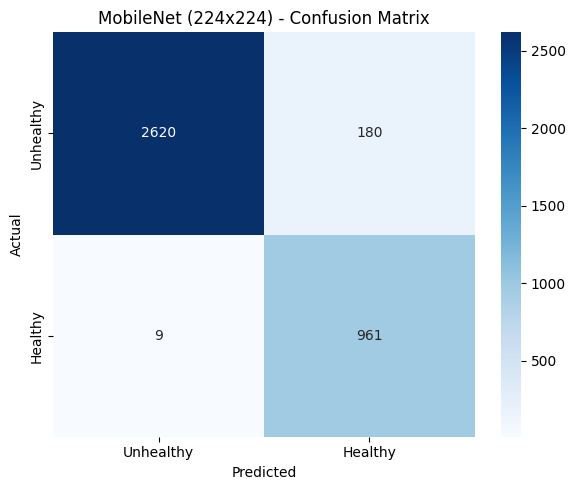

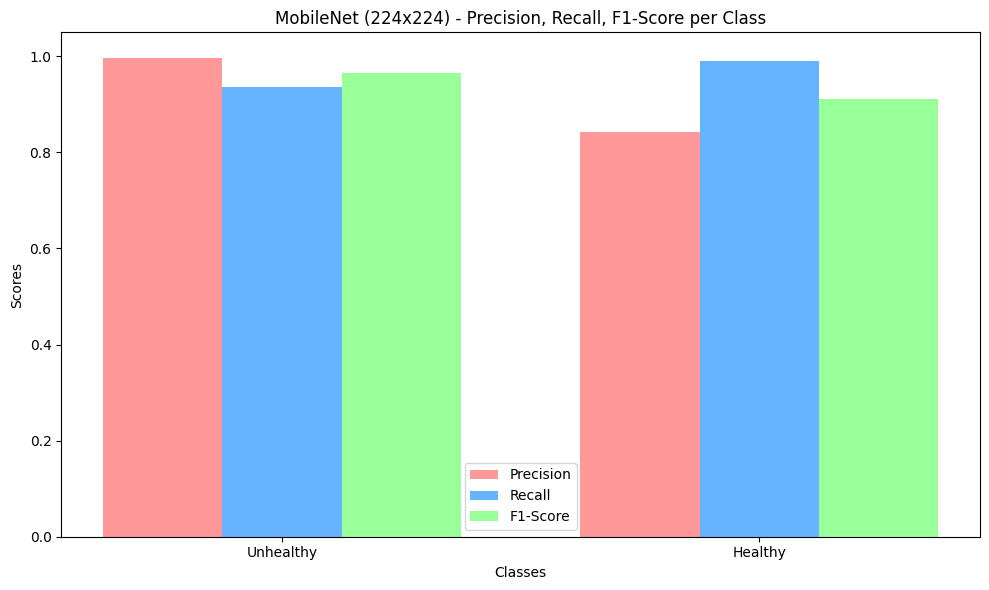

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

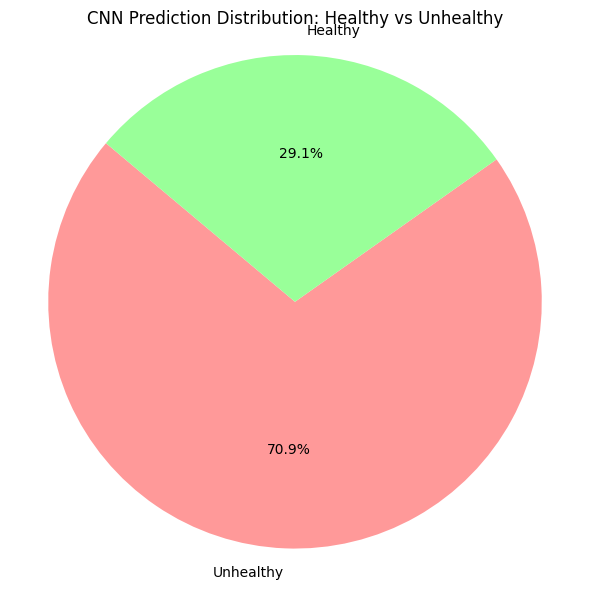

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

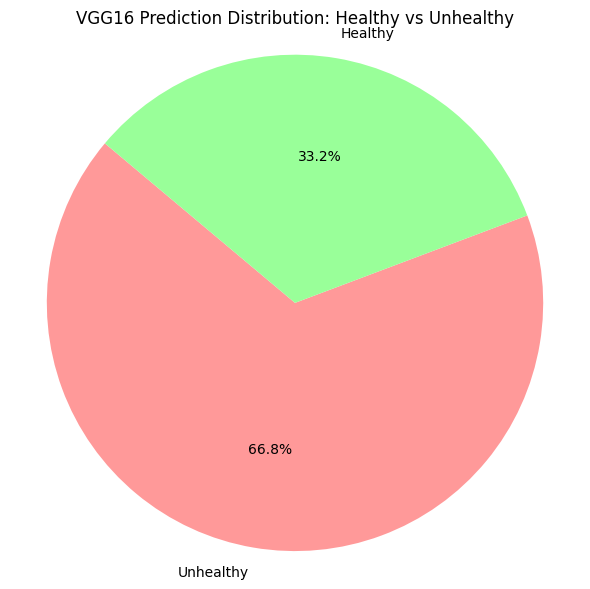

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━

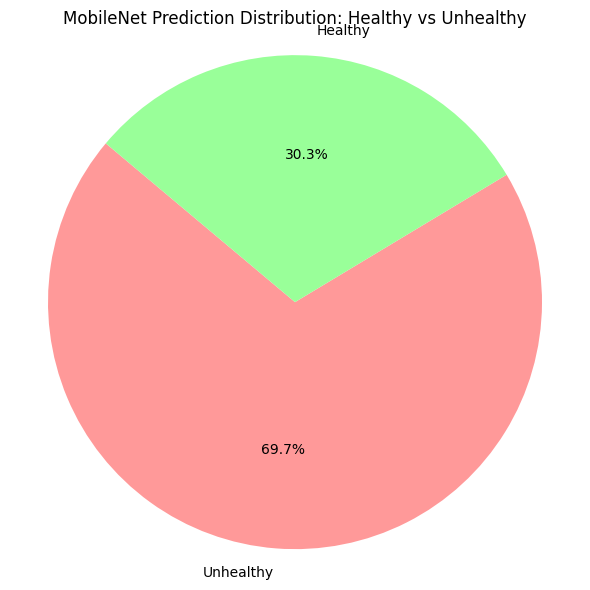

NameError: name 'metrics_cnn' is not defined

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, precision_recall_fscore_support

#  Load validation datasets
valid_dataset_cnn_raw = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

valid_dataset_large_raw = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

class_names_cnn = valid_dataset_cnn_raw.class_names
class_names_large = valid_dataset_large_raw.class_names

print("CNN Class Names:", class_names_cnn)
print("VGG16/MobileNet Class Names:", class_names_large)

#  Apply Rescaling
valid_dataset_cnn = valid_dataset_cnn_raw.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
valid_dataset_large = valid_dataset_large_raw.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

# Load models
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/PLANT MODELS COMPARISION/trained_plant_disease_model (3).keras')
vgg16_model = tf.keras.models.load_model('/content/drive/MyDrive/PLANT MODELS COMPARISION/trained_plant_disease_VGG16_model (1).keras')
mobilenet_model = tf.keras.models.load_model('/content/drive/MyDrive/PLANT MODELS COMPARISION/mobilenet_plant_disease_model.keras')

# Helper: Binary Healthy/Unhealthy
def to_binary_labels(class_names, labels):
    healthy_class_indices = [i for i, cls in enumerate(class_names) if 'healthy' in cls.lower()]
    return [1 if label in healthy_class_indices else 0 for label in labels]

#  Evaluate model
def evaluate_model(model, dataset, name, class_names):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        preds = model.predict(images)
        y_true.extend(to_binary_labels(class_names, np.argmax(labels.numpy(), axis=1)))
        y_pred.extend(to_binary_labels(class_names, np.argmax(preds, axis=1)))

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n Evaluation for {name}:")
    print(classification_report(y_true, y_pred, target_names=["Unhealthy", "Healthy"]))

    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

    #  Per-class precision, recall, f1 for binary (0: Unhealthy, 1: Healthy)
    per_class_precision, per_class_recall, per_class_f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=[0, 1], zero_division=0)

    #  Per-class Bar Chart
    x = np.arange(len(per_class_precision))  # [0, 1]
    width = 0.25
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x - width, per_class_precision, width, label='Precision', color='#ff9999')
    ax.bar(x, per_class_recall, width, label='Recall', color='#66b3ff')
    ax.bar(x + width, per_class_f1, width, label='F1-Score', color='#99ff99')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title(f'{name} - Precision, Recall, F1-Score per Class')
    ax.set_xticks(x)
    ax.set_xticklabels(['Unhealthy', 'Healthy'])
    ax.set_ylim(0, 1.05)
    ax.legend()
    plt.tight_layout()
    plt.show()

    return precision, recall, accuracy, f1, cm

# Evaluate all models
precision_cnn, recall_cnn, acc_cnn, f1_cnn, cm_cnn = evaluate_model(cnn_model, valid_dataset_cnn, "CNN (128x128)", class_names_cnn)
precision_vgg, recall_vgg, acc_vgg, f1_vgg, cm_vgg = evaluate_model(vgg16_model, valid_dataset_large, "VGG16 (224x224)", class_names_large)
precision_mob, recall_mob, acc_mob, f1_mob, cm_mob = evaluate_model(mobilenet_model, valid_dataset_large, "MobileNet (224x224)", class_names_large)

# # --- Model Comparison Summary Plot ---
# models = ['CNN', 'VGG16', 'MobileNet']
# accuracies = [acc_cnn, acc_vgg, acc_mob]
# precisions = [precision_cnn, precision_vgg, precision_mob]
# recalls = [recall_cnn, recall_vgg, recall_mob]
# f1_scores = [f1_cnn, f1_vgg, f1_mob]

# x = np.arange(len(models))
# width = 0.2

# plt.figure(figsize=(12, 6))
# plt.bar(x - width, accuracies, width, label='Accuracy', color='skyblue')
# plt.bar(x, precisions, width, label='Precision', color='lightgreen')
# plt.bar(x + width, recalls, width, label='Recall', color='salmon')
# plt.bar(x + 2*width, f1_scores, width, label='F1-Score', color='orange')

# for i in range(len(models)):
#     plt.text(x[i] - width, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
#     plt.text(x[i], precisions[i] + 0.01, f'{precisions[i]:.2f}', ha='center')
#     plt.text(x[i] + width, recalls[i] + 0.01, f'{recalls[i]:.2f}', ha='center')
#     plt.text(x[i] + 2*width, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center')

# plt.ylabel('Score')
# plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
# plt.xticks(x, models)
# plt.ylim(0, 1.2)
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


#  Function to generate pie chart for predicted distributions
def plot_prediction_distribution(model, dataset, class_names, model_name):
    y_pred_binary = []
    for images, _ in dataset:
        preds = model.predict(images)
        y_pred_binary.extend(to_binary_labels(class_names, np.argmax(preds, axis=1)))

    # Count predictions for each class
    labels_pie = ["Unhealthy", "Healthy"]
    counts = np.bincount(y_pred_binary)

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels_pie, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#99FF99'])
    plt.title(f"{model_name} Prediction Distribution: Healthy vs Unhealthy")
    plt.axis('equal')  # Circle shape
    plt.tight_layout()
    plt.show()

# --- Generate pie charts for all models ---
plot_prediction_distribution(cnn_model, valid_dataset_cnn, class_names_cnn, "CNN")
plot_prediction_distribution(vgg16_model, valid_dataset_large, class_names_large, "VGG16")
plot_prediction_distribution(mobilenet_model, valid_dataset_large, class_names_large, "MobileNet")


# Organize for grouped bar chart
metrics = {
    "CNN": metrics_cnn["per_class"],
    "VGG16": metrics_vgg["per_class"],
    "MobileNet": metrics_mob["per_class"]
}
#  Create single grouped bar chart
models = list(metrics.keys())
categories = ['precision', 'recall', 'f1']
labels = ['Healthy', 'Unhealthy']
bar_labels = [f"{label} {metric.capitalize()}" for metric in categories for label in labels]

x = np.arange(len(models))
width = 0.1

plt.figure(figsize=(14, 7))
colors = ['#00ba38', '#f8766d', '#00ba38', '#f8766d', '#00ba38', '#f8766d']  # Alternating green/red

# Loop through all metrics for healthy/unhealthy and plot
for i, (metric, label) in enumerate([(m, l) for m in categories for l in labels]):
    values = [metrics[model][label][metric] for model in models]
    plt.bar(x + (i - 2.5)*width, values, width, label=f"{label} {metric.capitalize()}", color=colors[i])
    for j in range(len(models)):
        plt.text(x[j] + (i - 2.5)*width, values[j] + 0.01, f'{values[j]:.2f}', ha='center', fontsize=8)

plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Comparison of Healthy & Unhealthy Metrics for CNN, VGG16, MobileNet")
plt.legend(loc="upper center", ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Found 3770 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
CNN Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_

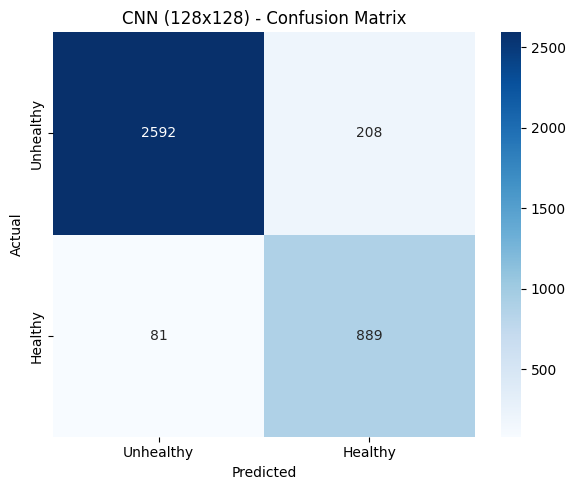

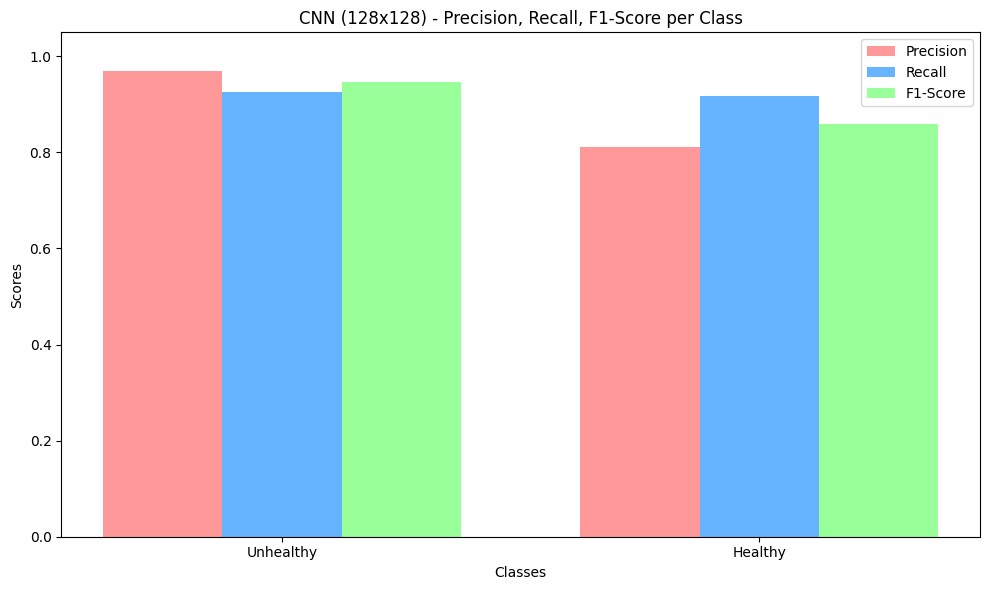

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

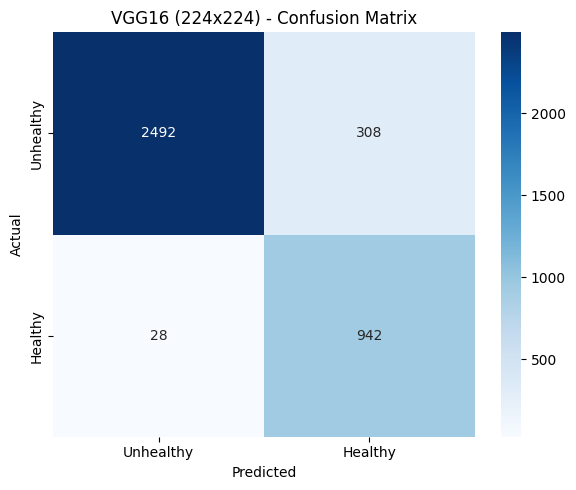

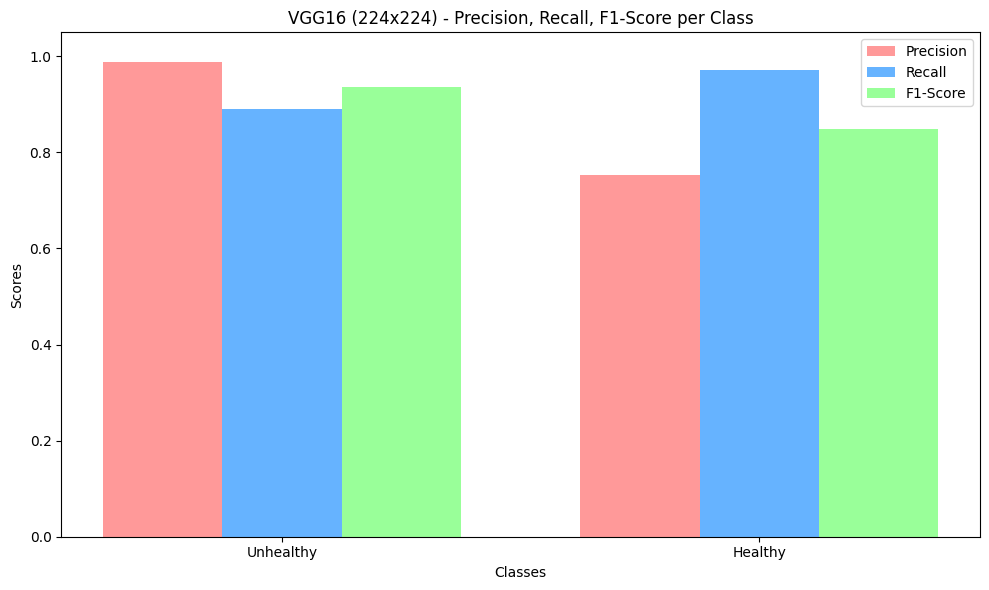

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━

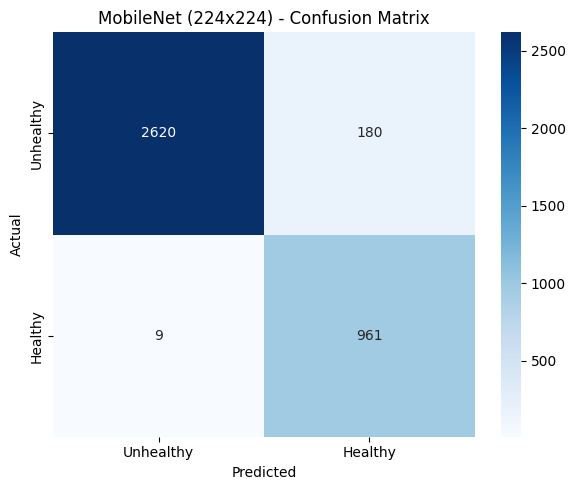

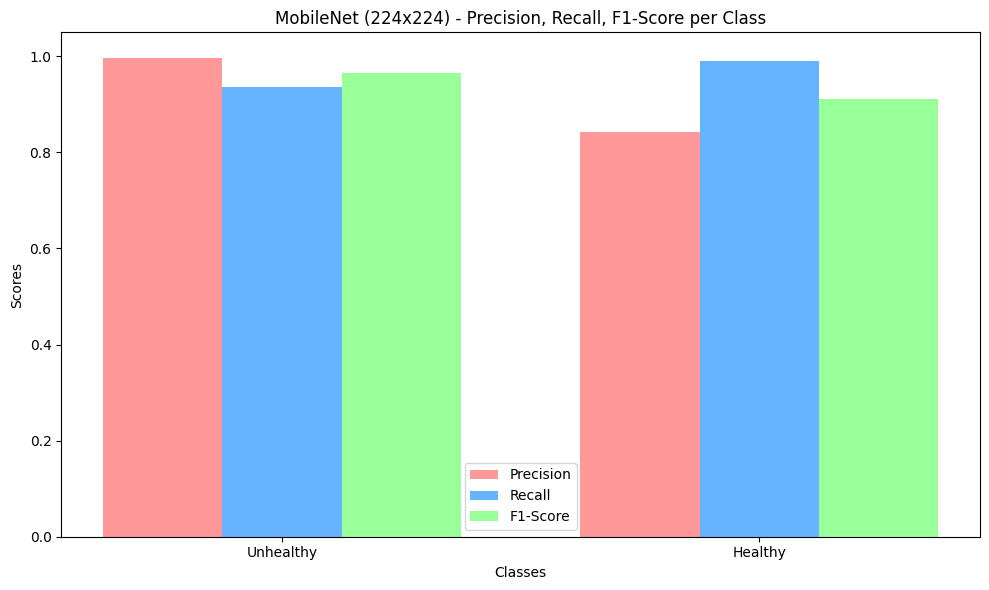

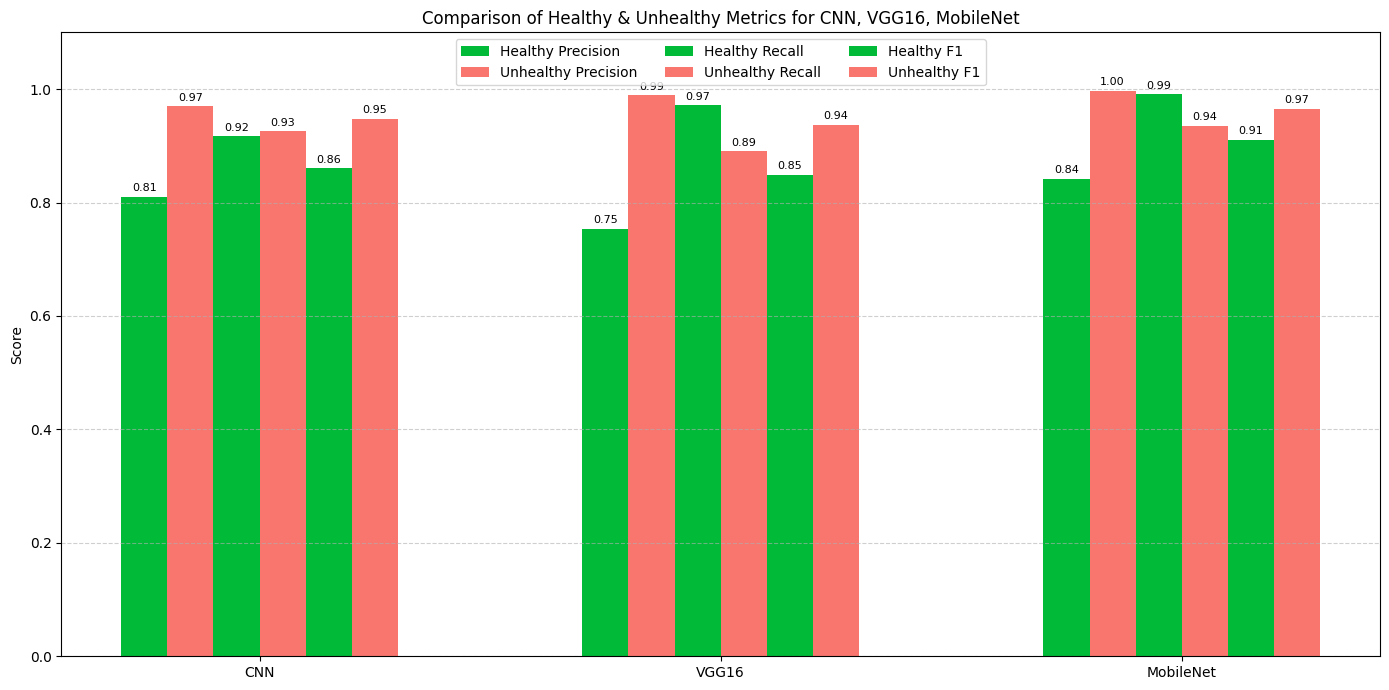

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

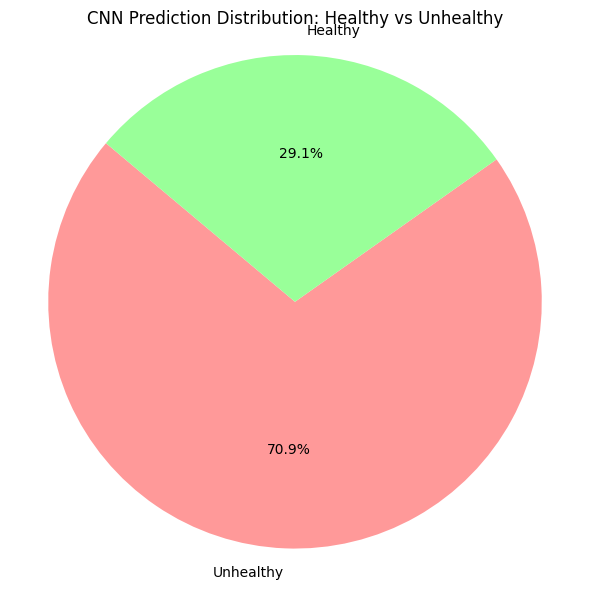

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

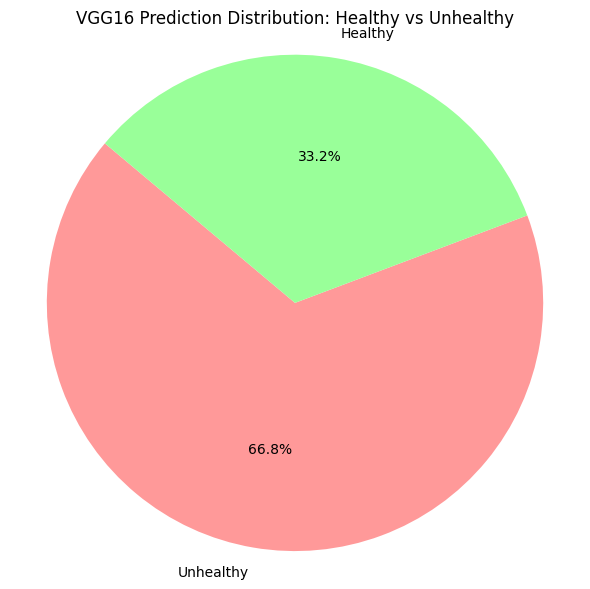

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━

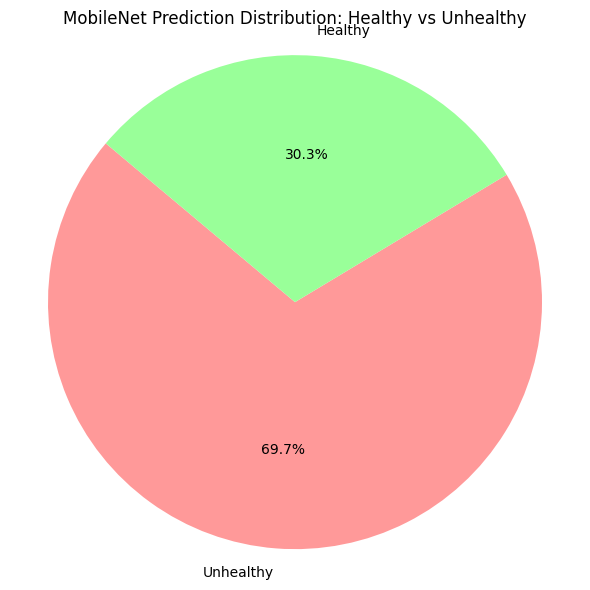

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, precision_recall_fscore_support

# --- Load validation datasets ---
valid_dataset_cnn_raw = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

valid_dataset_large_raw = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

class_names_cnn = valid_dataset_cnn_raw.class_names
class_names_large = valid_dataset_large_raw.class_names

print("CNN Class Names:", class_names_cnn)
print("VGG16/MobileNet Class Names:", class_names_large)

# Apply Rescaling
valid_dataset_cnn = valid_dataset_cnn_raw.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
valid_dataset_large = valid_dataset_large_raw.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

#  Load models
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/PLANT MODELS COMPARISION/trained_plant_disease_model (3).keras')
vgg16_model = tf.keras.models.load_model('/content/drive/MyDrive/PLANT MODELS COMPARISION/trained_plant_disease_VGG16_model (1).keras')
mobilenet_model = tf.keras.models.load_model('/content/drive/MyDrive/PLANT MODELS COMPARISION/mobilenet_plant_disease_model.keras')

#  Helper: Binary Healthy/Unhealthy
def to_binary_labels(class_names, labels):
    healthy_class_indices = [i for i, cls in enumerate(class_names) if 'healthy' in cls.lower()]
    return [1 if label in healthy_class_indices else 0 for label in labels]

#  Evaluate model
def evaluate_model(model, dataset, name, class_names):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        preds = model.predict(images)
        y_true.extend(to_binary_labels(class_names, np.argmax(labels.numpy(), axis=1)))
        y_pred.extend(to_binary_labels(class_names, np.argmax(preds, axis=1)))

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n Evaluation for {name}:")
    print(classification_report(y_true, y_pred, target_names=["Unhealthy", "Healthy"]))

    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # Per-class precision, recall, f1 for binary (0: Unhealthy, 1: Healthy)
    per_class_precision, per_class_recall, per_class_f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=[0, 1], zero_division=0)

    # Per-class Bar Chart
    x = np.arange(len(per_class_precision))  # [0, 1]
    width = 0.25
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x - width, per_class_precision, width, label='Precision', color='#ff9999')
    ax.bar(x, per_class_recall, width, label='Recall', color='#66b3ff')
    ax.bar(x + width, per_class_f1, width, label='F1-Score', color='#99ff99')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title(f'{name} - Precision, Recall, F1-Score per Class')
    ax.set_xticks(x)
    ax.set_xticklabels(['Unhealthy', 'Healthy'])
    ax.set_ylim(0, 1.05)
    ax.legend()
    plt.tight_layout()
    plt.show()

    return {
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy,
        "f1": f1,
        "confusion_matrix": cm,
        "per_class": {
            "Unhealthy": {"precision": per_class_precision[0], "recall": per_class_recall[0], "f1": per_class_f1[0]},
            "Healthy": {"precision": per_class_precision[1], "recall": per_class_recall[1], "f1": per_class_f1[1]}
        }
    }

#  Evaluate all models
metrics_cnn = evaluate_model(cnn_model, valid_dataset_cnn, "CNN (128x128)", class_names_cnn)
metrics_vgg = evaluate_model(vgg16_model, valid_dataset_large, "VGG16 (224x224)", class_names_large)
metrics_mob = evaluate_model(mobilenet_model, valid_dataset_large, "MobileNet (224x224)", class_names_large)

# Organize for grouped bar chart
metrics = {
    "CNN": metrics_cnn["per_class"],
    "VGG16": metrics_vgg["per_class"],
    "MobileNet": metrics_mob["per_class"]
}

#  Create single grouped bar chart
models = list(metrics.keys())
categories = ['precision', 'recall', 'f1']
labels = ['Healthy', 'Unhealthy']
bar_labels = [f"{label} {metric.capitalize()}" for metric in categories for label in labels]

x = np.arange(len(models))
width = 0.1

plt.figure(figsize=(14, 7))
colors = ['#00ba38', '#f8766d', '#00ba38', '#f8766d', '#00ba38', '#f8766d']  # Alternating green/red

# Loop through all metrics for healthy/unhealthy and plot
for i, (metric, label) in enumerate([(m, l) for m in categories for l in labels]):
    values = [metrics[model][label][metric] for model in models]
    plt.bar(x + (i - 2.5)*width, values, width, label=f"{label} {metric.capitalize()}", color=colors[i])
    for j in range(len(models)):
        plt.text(x[j] + (i - 2.5)*width, values[j] + 0.01, f'{values[j]:.2f}', ha='center', fontsize=8)

plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Comparison of Healthy & Unhealthy Metrics for CNN, VGG16, MobileNet")
plt.legend(loc="upper center", ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Function to generate pie chart for predicted distributions ---
def plot_prediction_distribution(model, dataset, class_names, model_name):
    y_pred_binary = []
    for images, _ in dataset:
        preds = model.predict(images)
        y_pred_binary.extend(to_binary_labels(class_names, np.argmax(preds, axis=1)))

    # Count predictions for each class
    labels_pie = ["Unhealthy", "Healthy"]
    counts = np.bincount(y_pred_binary)

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels_pie, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#99FF99'])
    plt.title(f"{model_name} Prediction Distribution: Healthy vs Unhealthy")
    plt.axis('equal')  # Circle shape
    plt.tight_layout()
    plt.show()

# Generate pie charts for all models
plot_prediction_distribution(cnn_model, valid_dataset_cnn, class_names_cnn, "CNN")
plot_prediction_distribution(vgg16_model, valid_dataset_large, class_names_large, "VGG16")
plot_prediction_distribution(mobilenet_model, valid_dataset_large, class_names_large, "MobileNet")


In [ ]:
import os

train_dir = "/content/drive/MyDrive/train"
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = num_images

# Print counts
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


Tomato___Leaf_Mold: 110
Tomato___Target_Spot: 102
Tomato___Spider_mites Two-spotted_spider_mite: 100
Tomato___Early_blight: 101
Tomato___Septoria_leaf_spot: 117
Tomato___Tomato_mosaic_virus: 112
Tomato___healthy: 111
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 106
Tomato___Bacterial_spot: 102
Tomato___Late_blight: 113
Raspberry___healthy: 103
Pepper,_bell___healthy: 111
Potato___healthy: 121
Potato___Late_blight: 101
Strawberry___healthy: 103
Strawberry___Leaf_scorch: 110
Squash___Powdery_mildew: 104
Pepper,_bell___Bacterial_spot: 100
Potato___Early_blight: 100
Peach___Bacterial_spot: 101
Orange___Haunglongbing_(Citrus_greening): 106
Grape___healthy: 113
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 103
Grape___Esca_(Black_Measles): 110
Corn_(maize)___Northern_Leaf_Blight: 103
Peach___healthy: 100
Corn_(maize)___healthy: 110
Corn_(maize)___Common_rust_: 34
Grape___Black_rot: 101
Cherry_(including_sour)___Powdery_mildew: 103
Apple___Black_rot: 110
Cherry_(including_sour)___healthy: 104
Apple_

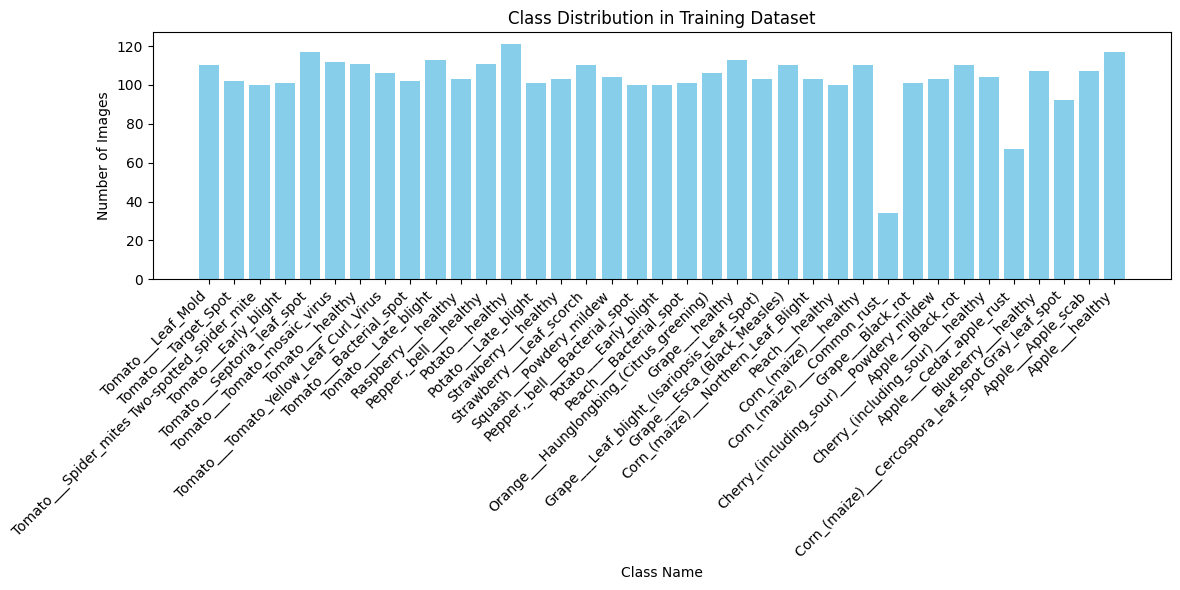

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
import hashlib
from collections import defaultdict

#  Set this to your dataset directory
dataset_dir = "/content/drive/MyDrive/train"

#  Set to True if you want to delete detected images
delete_bad = False
delete_duplicates = False

bad_images = []
duplicate_images = defaultdict(list)
hash_set = {}

def is_black_or_white(img):
    if img is None:
        return False
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean = gray.mean()
    #  print(f"Image Mean: {mean}")  # Debugging
    return mean < 5 or mean > 250  # Mostly black or white

def get_md5_hash(image_path):
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

#  Scan images
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        path = os.path.join(root, file)
        try:
            img = cv2.imread(path)
            if img is None or is_black_or_white(img):
                bad_images.append(path)
            else:
                img_hash = get_md5_hash(path)
                if img_hash in hash_set:
                    duplicate_images[img_hash].append(path)
                else:
                    hash_set[img_hash] = path
        except Exception as e:
            bad_images.append(path)

#  Delete bad images
print("\n Bad Images (Black/White or Unreadable):")
for img in bad_images:
    print(f" {img}")
    if delete_bad:
        os.remove(img)

#  Delete duplicate images
print("\n Duplicate Images:")
for hash_val, dup_list in duplicate_images.items():
    if len(dup_list) > 1:
        print(f" Original: {hash_set[hash_val]}")
        for dup in dup_list:
            print(f"   → Duplicate: {dup}")
            if delete_duplicates:
                os.remove(dup)

print("\n Cleaning complete!")



 Bad Images (Black/White or Unreadable):

 Duplicate Images:

 Cleaning complete!
